In [1]:
import numpy as np

from matplotlib import pyplot as plt
from src.environments.mg_simple import MGSimple

## Zero agent

In [ ]:
batch_size = 1
env = MGSimple(batch_size=batch_size, steps=24, min_temp=29, max_temp=31, peak_pv_gen=1, peak_conv_gen=1, peak_load=1)

# Initialize states and rewards

state_0, r_0, done, _ = env.reset()

states_za, rewards_za, actions_za = [], [], []

while not done:

    action = np.zeros((batch_size, 1))

    s_t, r_t, done, _ = env.step(action)

    states_za.append(s_t)
    rewards_za.append(r_t)
    actions_za.append(action)

states_za = np.stack(states_za, axis=1)
rewards_za = np.stack(rewards_za, axis=1)
actions_za = np.stack(actions_za, axis=1)

# Random Agent

In [ ]:
batch_size = 1
env = MGSimple(batch_size=batch_size, steps=24, min_temp=29, max_temp=31, peak_pv_gen=1, peak_conv_gen=1, peak_load=1)

# Initialize states and rewards

state_0, r_0, done, _ = env.reset()

states_ra, rewards_ra, actions_ra = [], [], []

while not done:

    action = np.random.uniform(low=-1, high=1, size=(batch_size, 1))

    s_t, r_t, done, _ = env.step(action)

    states_ra.append(s_t)
    rewards_ra.append(r_t)
    actions_ra.append(action)

states_ra = np.stack(states_ra, axis=1)
rewards_ra = np.stack(rewards_ra, axis=1)
actions_ra = np.stack(actions_ra, axis=1)

# A2C Causality cont.

In [ ]:
import traceback

from src.environments.mg_simple import MGSimple
from src.rl.a2c.c_mg_simple import Agent, set_all_seeds

# Get arguments from command line

disable_logging = False
batch_size = 4
training_steps = 500
rollout_steps = 24
actor_lr = 0.0001
critic_lr = 0.001
actor_nn = 64
critic_nn = 64
gamma = 1
enable_gpu = True
central_agent = False # Not needed yet
random_starting_step = True # Need to be refactored to random soc_0
encoding = False # Not needed yet
extended_observation = False # Not needed yet
epsilon = 0.01

# Start wandb logger

try:

    '''
        Setup all the configurations for Wandb
    '''

    wdb_config={
        "training_steps": training_steps,
        "batch_size": batch_size,
        "rollout_steps": rollout_steps,
        "agent_actor_lr": actor_lr,
        "agent_critic_lr": critic_lr,
        "agent_actor_nn": actor_nn,
        "agent_critic_nn": critic_nn,
        "gamma": gamma,
        "central_agent": central_agent,
        "random_starting_step": random_starting_step,
        "encoding": encoding,
        "extended_observation": extended_observation,
        "epsilon": epsilon,
    }

    '''
        Run the simulator
    '''

    set_all_seeds(0)

    # Instantiate the environment

    my_env = MGSimple(batch_size=batch_size, steps = rollout_steps, min_temp = 29, max_temp = 31, peak_pv_gen = 1, peak_conv_gen = 1, peak_load = 1)

    # Instantiate the agent

    agent = Agent(
        env=my_env, critic_lr=critic_lr, actor_lr=actor_lr, actor_nn=actor_nn, critic_nn=critic_nn, batch_size=batch_size, gamma=gamma,
        extended_obs=extended_observation, wandb_dict=wdb_config, enable_gpu=enable_gpu, disable_wandb=disable_logging,
    )

    # Launch the training

    all_states, all_rewards, all_actions = agent.train(training_steps=training_steps, epsilon=epsilon)

    # Finish Wandb execution

    agent.wdb_logger.finish()

except (RuntimeError, KeyboardInterrupt):

    traceback.print_exc()

print('A2C training completed')

# A2C Causality disc.

In [22]:
import traceback

from src.environments.mg_simple import MGSimple
from src.rl.a2c.d_mg_simple import Agent, set_all_seeds

# Get arguments from command line

disable_logging = True
batch_size = 2
training_steps = 500
rollout_steps = 24
actor_lr = 0.0001
critic_lr = 0.001
actor_nn = 64
critic_nn = 64
gamma = 1
enable_gpu = True
central_agent = False # Not needed yet
random_starting_step = True # Need to be refactored to random soc_0
encoding = False # Not needed yet
extended_observation = False # Not needed yet
epsilon = 0.01

# Start wandb logger

try:

    '''
        Setup all the configurations for Wandb
    '''

    wdb_config={
        "training_steps": training_steps,
        "batch_size": batch_size,
        "rollout_steps": rollout_steps,
        "agent_actor_lr": actor_lr,
        "agent_critic_lr": critic_lr,
        "agent_actor_nn": actor_nn,
        "agent_critic_nn": critic_nn,
        "gamma": gamma,
        "central_agent": central_agent,
        "random_starting_step": random_starting_step,
        "encoding": encoding,
        "extended_observation": extended_observation,
        "epsilon": epsilon,
    }

    '''
        Run the simulator
    '''

    set_all_seeds(0)

    # Instantiate the environment

    my_env = MGSimple(batch_size=batch_size, steps = rollout_steps, min_temp = 29, max_temp = 31, peak_pv_gen = 1, peak_conv_gen = 1, peak_load = 1)

    # Instantiate the agent

    agent = Agent(
        env=my_env, critic_lr=critic_lr, actor_lr=actor_lr, actor_nn=actor_nn, critic_nn=critic_nn, batch_size=batch_size, gamma=gamma,
        extended_obs=extended_observation, wandb_dict=wdb_config, enable_gpu=enable_gpu, disable_wandb=disable_logging,
    )

    # Launch the training

    all_states, all_rewards, all_actions = agent.train(training_steps=training_steps, epsilon=epsilon)

    # Finish Wandb execution

    agent.wdb_logger.finish()

except (RuntimeError, KeyboardInterrupt):

    traceback.print_exc()

print('A2C training completed')

Running on CPU


  0%|          | 0/500 [00:00<?, ?it/s]

rollout_avg_reward: -6.30094575881958 
actor_loss: 0.12441383302211761 
critic_loss: 7.39766263961792 
avg_action: 0.15000000000000008 


  0%|          | 2/500 [00:00<00:33, 14.81it/s]

Saving model on step: 0


  1%|          | 4/500 [00:00<00:32, 15.28it/s]

rollout_avg_reward: -6.215721130371094 
actor_loss: 4.775234699249268 
critic_loss: 5.154472827911377 
avg_action: 0.1445652173913044 


  2%|▏         | 10/500 [00:00<00:31, 15.70it/s]

rollout_avg_reward: -6.334777355194092 
actor_loss: -0.06654560565948486 
critic_loss: 4.733691692352295 
avg_action: 0.15000000000000008 


  3%|▎         | 14/500 [00:00<00:30, 15.73it/s]

rollout_avg_reward: -6.350674629211426 
actor_loss: -0.056318499147892 
critic_loss: 3.8614020347595215 
avg_action: 0.15000000000000008 


  4%|▍         | 20/500 [00:01<00:31, 15.19it/s]

rollout_avg_reward: -6.279555320739746 
actor_loss: -0.01979568414390087 
critic_loss: 3.014061689376831 
avg_action: 0.15000000000000008 


  5%|▍         | 24/500 [00:01<00:31, 15.22it/s]

rollout_avg_reward: -6.338149547576904 
actor_loss: -0.010169858112931252 
critic_loss: 2.534431219100952 
avg_action: 0.15000000000000008 


  6%|▌         | 30/500 [00:01<00:30, 15.57it/s]

rollout_avg_reward: -6.306475639343262 
actor_loss: 3.9957115650177 
critic_loss: 1.96998131275177 
avg_action: 0.1445652173913044 


  7%|▋         | 34/500 [00:02<00:30, 15.48it/s]

rollout_avg_reward: -6.267446517944336 
actor_loss: -2.509570837020874 
critic_loss: 1.4888962507247925 
avg_action: 0.14130434782608703 


  8%|▊         | 40/500 [00:02<00:29, 15.70it/s]

rollout_avg_reward: -6.242335319519043 
actor_loss: 0.5188912153244019 
critic_loss: 1.1499706506729126 
avg_action: 0.1445652173913044 


  9%|▉         | 44/500 [00:02<00:29, 15.22it/s]

rollout_avg_reward: -6.340598106384277 
actor_loss: -0.01845521479845047 
critic_loss: 0.9478104710578918 
avg_action: 0.15000000000000008 


 10%|█         | 50/500 [00:03<00:29, 15.40it/s]

rollout_avg_reward: -6.3327107429504395 
actor_loss: -0.007864508777856827 
critic_loss: 0.7458805441856384 
avg_action: 0.15000000000000008 


 11%|█         | 54/500 [00:03<00:28, 15.41it/s]

Saving model on step: 50
rollout_avg_reward: -6.298376083374023 
actor_loss: -0.009439902380108833 
critic_loss: 0.5858359336853027 
avg_action: 0.15000000000000008 


 12%|█▏        | 60/500 [00:03<00:28, 15.18it/s]

rollout_avg_reward: -6.333112716674805 
actor_loss: -0.015669386833906174 
critic_loss: 0.49185910820961 
avg_action: 0.15000000000000008 


 13%|█▎        | 64/500 [00:04<00:29, 14.87it/s]

rollout_avg_reward: -6.3102006912231445 
actor_loss: -0.005167760886251926 
critic_loss: 0.42437610030174255 
avg_action: 0.15000000000000008 


 14%|█▍        | 70/500 [00:04<00:29, 14.66it/s]

rollout_avg_reward: -6.24957275390625 
actor_loss: 2.3692286014556885 
critic_loss: 0.38550278544425964 
avg_action: 0.13260869565217398 


 15%|█▍        | 74/500 [00:04<00:28, 15.12it/s]

rollout_avg_reward: -6.294561386108398 
actor_loss: -0.8235872387886047 
critic_loss: 0.3534250557422638 
avg_action: 0.1478260869565218 


 16%|█▌        | 80/500 [00:05<00:27, 15.47it/s]

rollout_avg_reward: -6.312612533569336 
actor_loss: -0.00118618318811059 
critic_loss: 0.3459477126598358 
avg_action: 0.15000000000000008 


 17%|█▋        | 84/500 [00:05<00:26, 15.56it/s]

rollout_avg_reward: -6.316896438598633 
actor_loss: 2.6350960731506348 
critic_loss: 0.33305251598358154 
avg_action: 0.1445652173913044 


 18%|█▊        | 90/500 [00:05<00:26, 15.69it/s]

rollout_avg_reward: -6.3189826011657715 
actor_loss: 0.008672690950334072 
critic_loss: 0.3258311152458191 
avg_action: 0.15000000000000008 


 19%|█▉        | 94/500 [00:06<00:25, 15.64it/s]

rollout_avg_reward: -6.365512847900391 
actor_loss: 0.0036705257371068 
critic_loss: 0.3050098121166229 
avg_action: 0.15000000000000008 


 20%|██        | 100/500 [00:06<00:25, 15.74it/s]

rollout_avg_reward: -6.326343536376953 
actor_loss: 1.1829924583435059 
critic_loss: 0.3051382899284363 
avg_action: 0.14347826086956528 


 21%|██        | 104/500 [00:06<00:25, 15.65it/s]

Saving model on step: 100
rollout_avg_reward: -6.319522857666016 
actor_loss: 0.007913736626505852 
critic_loss: 0.30290260910987854 
avg_action: 0.15000000000000008 


 22%|██▏       | 110/500 [00:07<00:24, 15.78it/s]

rollout_avg_reward: -6.27314567565918 
actor_loss: 0.012514643371105194 
critic_loss: 0.3074114918708801 
avg_action: 0.15000000000000008 


 23%|██▎       | 114/500 [00:07<00:24, 15.56it/s]

rollout_avg_reward: -6.324836730957031 
actor_loss: 0.0034484006464481354 
critic_loss: 0.28781941533088684 
avg_action: 0.15000000000000008 


 24%|██▍       | 120/500 [00:07<00:24, 15.67it/s]

rollout_avg_reward: -6.3462233543396 
actor_loss: 0.0027673831209540367 
critic_loss: 0.2752216160297394 
avg_action: 0.15000000000000008 


 25%|██▍       | 124/500 [00:08<00:23, 15.68it/s]

rollout_avg_reward: -6.306454658508301 
actor_loss: 0.007968682795763016 
critic_loss: 0.28004327416419983 
avg_action: 0.15000000000000008 


 26%|██▌       | 130/500 [00:08<00:23, 15.87it/s]

rollout_avg_reward: -6.275145530700684 
actor_loss: 0.16484488546848297 
critic_loss: 0.27495765686035156 
avg_action: 0.14130434782608703 


 27%|██▋       | 134/500 [00:08<00:22, 15.94it/s]

rollout_avg_reward: -6.292314529418945 
actor_loss: 0.004750567022711039 
critic_loss: 0.27163583040237427 
avg_action: 0.15000000000000008 


 28%|██▊       | 140/500 [00:09<00:22, 15.88it/s]

rollout_avg_reward: -6.3243818283081055 
actor_loss: 2.123192548751831 
critic_loss: 0.25827881693840027 
avg_action: 0.1445652173913044 


 29%|██▉       | 144/500 [00:09<00:22, 15.65it/s]

rollout_avg_reward: -6.366311073303223 
actor_loss: 0.004844318609684706 
critic_loss: 0.2463035136461258 
avg_action: 0.15000000000000008 


 30%|███       | 150/500 [00:09<00:23, 15.15it/s]

rollout_avg_reward: -6.324678421020508 
actor_loss: 0.006089068949222565 
critic_loss: 0.25063225626945496 
avg_action: 0.15000000000000008 


 31%|███       | 154/500 [00:09<00:22, 15.43it/s]

Saving model on step: 150
rollout_avg_reward: -6.310658931732178 
actor_loss: 0.007907663471996784 
critic_loss: 0.2509022057056427 
avg_action: 0.15000000000000008 


 32%|███▏      | 160/500 [00:10<00:21, 15.76it/s]

rollout_avg_reward: -6.264193534851074 
actor_loss: 0.12831556797027588 
critic_loss: 0.2516046464443207 
avg_action: 0.1445652173913044 


 33%|███▎      | 164/500 [00:10<00:21, 15.76it/s]

rollout_avg_reward: -6.267663955688477 
actor_loss: 0.003864469937980175 
critic_loss: 0.25291818380355835 
avg_action: 0.15000000000000008 


 34%|███▍      | 170/500 [00:10<00:20, 15.94it/s]

rollout_avg_reward: -6.322142601013184 
actor_loss: 0.00794733501970768 
critic_loss: 0.2392740249633789 
avg_action: 0.15000000000000008 


 35%|███▍      | 174/500 [00:11<00:20, 15.79it/s]

rollout_avg_reward: -6.317574501037598 
actor_loss: 0.009527333080768585 
critic_loss: 0.23913943767547607 
avg_action: 0.15000000000000008 


 36%|███▌      | 180/500 [00:11<00:20, 15.79it/s]

rollout_avg_reward: -6.397506237030029 
actor_loss: -1.136277675628662 
critic_loss: 0.2330021858215332 
avg_action: 0.1543478260869566 


 37%|███▋      | 184/500 [00:11<00:19, 15.84it/s]

rollout_avg_reward: -6.305272102355957 
actor_loss: 0.008622175082564354 
critic_loss: 0.23629555106163025 
avg_action: 0.15000000000000008 


 38%|███▊      | 190/500 [00:12<00:21, 14.44it/s]

rollout_avg_reward: -6.25276517868042 
actor_loss: 2.6915366649627686 
critic_loss: 0.2419373244047165 
avg_action: 0.13586956521739138 


 39%|███▉      | 194/500 [00:12<00:20, 14.68it/s]

rollout_avg_reward: -6.361617088317871 
actor_loss: 0.005563957616686821 
critic_loss: 0.22349876165390015 
avg_action: 0.15000000000000008 


 40%|████      | 200/500 [00:12<00:19, 15.04it/s]

rollout_avg_reward: -6.346851825714111 
actor_loss: 2.7179043292999268 
critic_loss: 0.22628726065158844 
avg_action: 0.1543478260869566 


 41%|████      | 204/500 [00:13<00:19, 15.02it/s]

Saving model on step: 200
rollout_avg_reward: -6.31839656829834 
actor_loss: 0.00301766162738204 
critic_loss: 0.22956588864326477 
avg_action: 0.15000000000000008 


 42%|████▏     | 210/500 [00:13<00:19, 14.78it/s]

rollout_avg_reward: -6.31323766708374 
actor_loss: 0.010339281521737576 
critic_loss: 0.22728148102760315 
avg_action: 0.15000000000000008 


 43%|████▎     | 214/500 [00:13<00:19, 14.97it/s]

rollout_avg_reward: -6.301835060119629 
actor_loss: 0.009356752969324589 
critic_loss: 0.22978538274765015 
avg_action: 0.15000000000000008 


 44%|████▍     | 220/500 [00:14<00:18, 15.10it/s]

rollout_avg_reward: -6.324852466583252 
actor_loss: 1.4608690738677979 
critic_loss: 0.22090142965316772 
avg_action: 0.1445652173913044 


 45%|████▍     | 224/500 [00:14<00:18, 15.03it/s]

rollout_avg_reward: -6.332339763641357 
actor_loss: 1.059301495552063 
critic_loss: 0.22013996541500092 
avg_action: 0.1445652173913044 


 46%|████▌     | 230/500 [00:14<00:18, 14.86it/s]

rollout_avg_reward: -6.35322380065918 
actor_loss: 0.006293238140642643 
critic_loss: 0.21557798981666565 
avg_action: 0.15000000000000008 


 47%|████▋     | 234/500 [00:15<00:18, 14.49it/s]

rollout_avg_reward: -6.306711673736572 
actor_loss: 0.008540515787899494 
critic_loss: 0.22307893633842468 
avg_action: 0.15000000000000008 


 48%|████▊     | 240/500 [00:15<00:17, 14.85it/s]

rollout_avg_reward: -6.271650314331055 
actor_loss: 0.18123601377010345 
critic_loss: 0.21103064715862274 
avg_action: 0.1445652173913044 


 49%|████▉     | 244/500 [00:15<00:17, 14.96it/s]

rollout_avg_reward: -6.328509330749512 
actor_loss: 0.00831796694546938 
critic_loss: 0.2173067182302475 
avg_action: 0.15000000000000008 


 50%|█████     | 250/500 [00:16<00:17, 14.71it/s]

rollout_avg_reward: -6.262092113494873 
actor_loss: 0.015867743641138077 
critic_loss: 0.22507460415363312 
avg_action: 0.15000000000000008 


 50%|█████     | 252/500 [00:16<00:16, 14.63it/s]

Saving model on step: 250


 51%|█████     | 254/500 [00:16<00:16, 14.74it/s]

rollout_avg_reward: -6.293098449707031 
actor_loss: 2.595078229904175 
critic_loss: 0.22034862637519836 
avg_action: 0.1445652173913044 


 52%|█████▏    | 260/500 [00:16<00:15, 15.02it/s]

rollout_avg_reward: -6.300543785095215 
actor_loss: 0.01102706789970398 
critic_loss: 0.21741841733455658 
avg_action: 0.15000000000000008 


 53%|█████▎    | 264/500 [00:17<00:15, 14.97it/s]

rollout_avg_reward: -6.291092395782471 
actor_loss: -0.5681391358375549 
critic_loss: 0.20499885082244873 
avg_action: 0.14347826086956528 


 54%|█████▍    | 270/500 [00:17<00:15, 14.89it/s]

rollout_avg_reward: -6.325394630432129 
actor_loss: 1.2968672513961792 
critic_loss: 0.20688238739967346 
avg_action: 0.1445652173913044 


 55%|█████▍    | 274/500 [00:17<00:15, 15.04it/s]

rollout_avg_reward: -6.278061866760254 
actor_loss: 0.0047512720339000225 
critic_loss: 0.21569305658340454 
avg_action: 0.15000000000000008 


 56%|█████▌    | 280/500 [00:18<00:14, 15.14it/s]

rollout_avg_reward: -6.304861068725586 
actor_loss: 0.17442886531352997 
critic_loss: 0.20245039463043213 
avg_action: 0.1445652173913044 


 57%|█████▋    | 284/500 [00:18<00:14, 15.09it/s]

rollout_avg_reward: -6.247713088989258 
actor_loss: 3.1577744483947754 
critic_loss: 0.215462788939476 
avg_action: 0.13586956521739138 


 58%|█████▊    | 290/500 [00:18<00:13, 15.12it/s]

rollout_avg_reward: -6.326873779296875 
actor_loss: 0.01194774080067873 
critic_loss: 0.2057270109653473 
avg_action: 0.15000000000000008 


 59%|█████▉    | 294/500 [00:19<00:13, 15.04it/s]

rollout_avg_reward: -6.3400559425354 
actor_loss: 0.008346601389348507 
critic_loss: 0.2028244435787201 
avg_action: 0.15000000000000008 


 60%|██████    | 300/500 [00:19<00:13, 15.36it/s]

rollout_avg_reward: -6.335838317871094 
actor_loss: 1.352155327796936 
critic_loss: 0.20243093371391296 
avg_action: 0.1445652173913044 


 60%|██████    | 302/500 [00:19<00:13, 14.64it/s]

Saving model on step: 300


 61%|██████    | 304/500 [00:19<00:13, 14.40it/s]

rollout_avg_reward: -6.273626327514648 
actor_loss: 0.009974253363907337 
critic_loss: 0.2073495090007782 
avg_action: 0.15000000000000008 


 62%|██████▏   | 310/500 [00:20<00:14, 12.77it/s]

rollout_avg_reward: -6.25831413269043 
actor_loss: 0.9501128792762756 
critic_loss: 0.2062530368566513 
avg_action: 0.1445652173913044 


 63%|██████▎   | 314/500 [00:20<00:13, 13.77it/s]

rollout_avg_reward: -6.323946952819824 
actor_loss: -0.014589617028832436 
critic_loss: 0.20187103748321533 
avg_action: 0.15000000000000008 


 64%|██████▍   | 320/500 [00:21<00:11, 15.02it/s]

rollout_avg_reward: -6.362182140350342 
actor_loss: 0.017358064651489258 
critic_loss: 0.19558461010456085 
avg_action: 0.15000000000000008 


 65%|██████▍   | 324/500 [00:21<00:11, 15.39it/s]

rollout_avg_reward: -6.3154401779174805 
actor_loss: -0.024008341133594513 
critic_loss: 0.2009137123823166 
avg_action: 0.15000000000000008 


 66%|██████▌   | 330/500 [00:21<00:10, 15.54it/s]

rollout_avg_reward: -6.299347877502441 
actor_loss: -0.9033254384994507 
critic_loss: 0.1899956613779068 
avg_action: 0.13913043478260875 


 67%|██████▋   | 334/500 [00:21<00:10, 15.53it/s]

rollout_avg_reward: -6.221053600311279 
actor_loss: -0.7061769366264343 
critic_loss: 0.20758603513240814 
avg_action: 0.14130434782608703 


 68%|██████▊   | 340/500 [00:22<00:10, 15.52it/s]

rollout_avg_reward: -6.2457780838012695 
actor_loss: 3.180182456970215 
critic_loss: 0.19337107241153717 
avg_action: 0.13478260869565223 


 69%|██████▉   | 344/500 [00:22<00:10, 15.31it/s]

rollout_avg_reward: -6.271213531494141 
actor_loss: -0.3717525899410248 
critic_loss: 0.18940375745296478 
avg_action: 0.1445652173913044 


 70%|███████   | 350/500 [00:23<00:09, 15.07it/s]

rollout_avg_reward: -6.217129230499268 
actor_loss: -0.39908650517463684 
critic_loss: 0.19188211858272552 
avg_action: 0.14239130434782615 


 70%|███████   | 352/500 [00:23<00:09, 14.91it/s]

Saving model on step: 350


 71%|███████   | 354/500 [00:23<00:09, 14.96it/s]

rollout_avg_reward: -6.166164398193359 
actor_loss: 2.3828840255737305 
critic_loss: 0.19794730842113495 
avg_action: 0.13586956521739138 


 72%|███████▏  | 360/500 [00:23<00:09, 15.19it/s]

rollout_avg_reward: -6.215855598449707 
actor_loss: 2.7812511920928955 
critic_loss: 0.193010613322258 
avg_action: 0.1336956521739131 


 73%|███████▎  | 364/500 [00:23<00:08, 15.13it/s]

rollout_avg_reward: -6.2581892013549805 
actor_loss: -0.8265595436096191 
critic_loss: 0.19427648186683655 
avg_action: 0.1445652173913044 


 74%|███████▍  | 370/500 [00:24<00:08, 15.24it/s]

rollout_avg_reward: -6.262995719909668 
actor_loss: 0.008468959480524063 
critic_loss: 0.1848880499601364 
avg_action: 0.1336956521739131 


 75%|███████▍  | 374/500 [00:24<00:08, 15.40it/s]

rollout_avg_reward: -6.3042168617248535 
actor_loss: 0.4519616961479187 
critic_loss: 0.1880347579717636 
avg_action: 0.1445652173913044 


 76%|███████▌  | 380/500 [00:25<00:07, 15.48it/s]

rollout_avg_reward: -6.333642482757568 
actor_loss: -0.02539954148232937 
critic_loss: 0.1867707073688507 
avg_action: 0.15000000000000008 


 77%|███████▋  | 384/500 [00:25<00:07, 15.48it/s]

rollout_avg_reward: -6.3079094886779785 
actor_loss: -0.06550249457359314 
critic_loss: 0.19143031537532806 
avg_action: 0.15000000000000008 


 78%|███████▊  | 390/500 [00:25<00:07, 15.55it/s]

rollout_avg_reward: -6.258065223693848 
actor_loss: 1.4805344343185425 
critic_loss: 0.18770593404769897 
avg_action: 0.141304347826087 


 79%|███████▉  | 394/500 [00:25<00:06, 15.51it/s]

rollout_avg_reward: -6.266571044921875 
actor_loss: 0.23210397362709045 
critic_loss: 0.17841987311840057 
avg_action: 0.14347826086956528 


 80%|████████  | 400/500 [00:26<00:06, 15.45it/s]

rollout_avg_reward: -6.271927833557129 
actor_loss: 2.357785701751709 
critic_loss: 0.18012180924415588 
avg_action: 0.1304347826086957 


 80%|████████  | 402/500 [00:26<00:06, 15.28it/s]

Saving model on step: 400


 81%|████████  | 404/500 [00:26<00:06, 15.17it/s]

rollout_avg_reward: -6.20742654800415 
actor_loss: 1.2290031909942627 
critic_loss: 0.18735720217227936 
avg_action: 0.13586956521739138 


 82%|████████▏ | 410/500 [00:26<00:06, 14.70it/s]

rollout_avg_reward: -6.228073596954346 
actor_loss: -0.5391523241996765 
critic_loss: 0.17746423184871674 
avg_action: 0.13913043478260875 


 83%|████████▎ | 414/500 [00:27<00:05, 14.82it/s]

rollout_avg_reward: -6.241997241973877 
actor_loss: 2.3166892528533936 
critic_loss: 0.1861732453107834 
avg_action: 0.13586956521739138 


 84%|████████▍ | 420/500 [00:27<00:05, 15.35it/s]

rollout_avg_reward: -6.169491767883301 
actor_loss: 1.0944761037826538 
critic_loss: 0.17196258902549744 
avg_action: 0.13043478260869573 


 85%|████████▍ | 424/500 [00:27<00:04, 15.55it/s]

rollout_avg_reward: -6.035693168640137 
actor_loss: -0.46579068899154663 
critic_loss: 0.1754601150751114 
avg_action: 0.12826086956521743 


 86%|████████▌ | 430/500 [00:28<00:04, 15.59it/s]

rollout_avg_reward: -6.275537014007568 
actor_loss: 0.24418042600154877 
critic_loss: 0.18052762746810913 
avg_action: 0.13804347826086963 


 87%|████████▋ | 434/500 [00:28<00:04, 15.46it/s]

rollout_avg_reward: -6.32613468170166 
actor_loss: -0.10771001130342484 
critic_loss: 0.18420638144016266 
avg_action: 0.15000000000000008 


 88%|████████▊ | 440/500 [00:28<00:03, 15.66it/s]

rollout_avg_reward: -6.32093620300293 
actor_loss: -0.6203336119651794 
critic_loss: 0.18469727039337158 
avg_action: 0.1445652173913044 


 89%|████████▉ | 444/500 [00:29<00:03, 15.53it/s]

rollout_avg_reward: -6.182525634765625 
actor_loss: 0.19684846699237823 
critic_loss: 0.16978725790977478 
avg_action: 0.12934782608695658 


 90%|█████████ | 450/500 [00:29<00:03, 15.70it/s]

rollout_avg_reward: -6.319113254547119 
actor_loss: -0.558914840221405 
critic_loss: 0.18876264989376068 
avg_action: 0.13586956521739138 


 91%|█████████ | 454/500 [00:29<00:02, 15.78it/s]

Saving model on step: 450
rollout_avg_reward: -6.219179630279541 
actor_loss: 2.799694538116455 
critic_loss: 0.17563533782958984 
avg_action: 0.12717391304347833 


 92%|█████████▏| 460/500 [00:30<00:02, 15.48it/s]

rollout_avg_reward: -6.130755424499512 
actor_loss: 0.5213409066200256 
critic_loss: 0.17838521301746368 
avg_action: 0.12500000000000008 


 93%|█████████▎| 464/500 [00:30<00:02, 15.54it/s]

rollout_avg_reward: -6.21030330657959 
actor_loss: 1.2742515802383423 
critic_loss: 0.16840223968029022 
avg_action: 0.13913043478260875 


 94%|█████████▍| 470/500 [00:30<00:01, 15.73it/s]

rollout_avg_reward: -6.007822036743164 
actor_loss: 4.747883319854736 
critic_loss: 0.2091170847415924 
avg_action: 0.11521739130434788 


 95%|█████████▍| 474/500 [00:31<00:01, 15.77it/s]

rollout_avg_reward: -6.195594787597656 
actor_loss: -2.2205495834350586 
critic_loss: 0.17131218314170837 
avg_action: 0.13804347826086963 


 96%|█████████▌| 480/500 [00:31<00:01, 15.78it/s]

rollout_avg_reward: -6.190752983093262 
actor_loss: 0.7600062489509583 
critic_loss: 0.1698765903711319 
avg_action: 0.13260869565217398 


 97%|█████████▋| 484/500 [00:31<00:01, 15.57it/s]

rollout_avg_reward: -6.095770835876465 
actor_loss: -2.270416259765625 
critic_loss: 0.17505666613578796 
avg_action: 0.1086956521739131 


 98%|█████████▊| 490/500 [00:32<00:00, 15.64it/s]

rollout_avg_reward: -6.136177062988281 
actor_loss: 1.5819461345672607 
critic_loss: 0.16751906275749207 
avg_action: 0.12173913043478268 


 99%|█████████▉| 494/500 [00:32<00:00, 15.67it/s]

rollout_avg_reward: -6.0805344581604 
actor_loss: 1.6488163471221924 
critic_loss: 0.15265648066997528 
avg_action: 0.10543478260869572 


100%|██████████| 500/500 [00:32<00:00, 15.26it/s]

A2C training completed


In [21]:
np.stack(all_rewards).squeeze(axis=-1).shape

(500, 23, 1)

In [14]:
all_rewards = np.stack(all_rewards, axis=0).squeeze()
all_actions = np.stack(all_actions, axis=0).squeeze()
all_states = np.stack(all_states, axis=0).squeeze()

plt.plot(all_rewards[0,:,0], label='reward 0 0')
plt.plot(all_rewards[250,:,0], label='reward 250 0')
plt.plot(all_rewards[499,:,0], label='reward 499 0')
plt.legend()
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
all_rewards[:,:,0]

In [13]:
plt.plot(all_actions[0,:,0], label='actions 0')
plt.plot(all_actions[250,:,0], label='actions 250')
plt.plot(all_actions[499,:,0], label='actions 499')
plt.legend()
plt.show()

TypeError: list indices must be integers or slices, not tuple

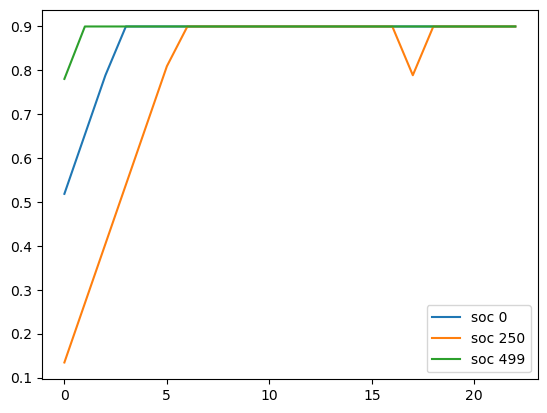

In [10]:
all_socs = all_states[:,:,:,8]

plt.plot(all_socs[0,:,0], label='soc 0')
plt.plot(all_socs[250,:,0], label='soc 250')
plt.plot(all_socs[499,:,0], label='soc 499')
plt.legend()
plt.show()

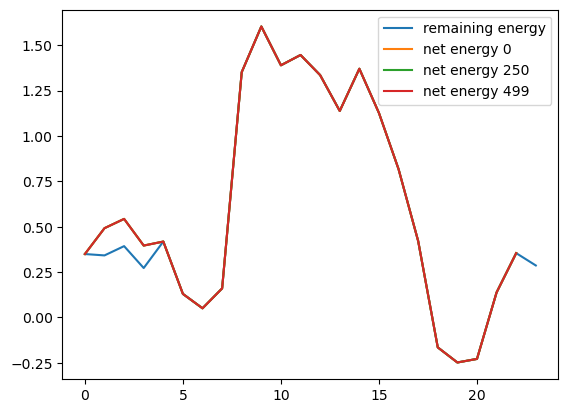

In [4]:
all_net_energy = all_states[:,:,:,4]
remaining_energy = my_env.mg.remaining_energy

plt.plot(remaining_energy, label='remaining energy')
plt.plot(all_net_energy[0,:,0], label='net energy 0')
plt.plot(all_net_energy[250,:,0], label='net energy 250')
plt.plot(all_net_energy[499,:,0], label='net energy 499')
plt.legend()
plt.show()

In [ ]:
remaining_energy = my_env.mg.remaining_energy

plt.plot(remaining_energy, label='remaining energy')
plt.legend()
plt.show()